In [127]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [126]:
df = pd.read_csv("/content/Life Expectancy Data.csv")

In [128]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [129]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [130]:
df.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [167]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [131]:
df1 = df.dropna()     #Remove rows with missing values
print(df1)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [132]:
df1.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [137]:
df1.shape

(1649, 22)

Correlation with 'Life expectancy':
Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
BMI                                0.542042
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Total expenditure                  0.174718
Year                               0.050771
Population                        -0.022305
Measles                           -0.068881
infant deaths                     -0.169074
under-five deaths                 -0.192265
thinness 5-9 years                -0.457508
thinness  1-19 years              -0.457838
HIV/AIDS                          -0.592236
Adult Mortality                   -0.702523
Name: Life expectancy, dtype: float64


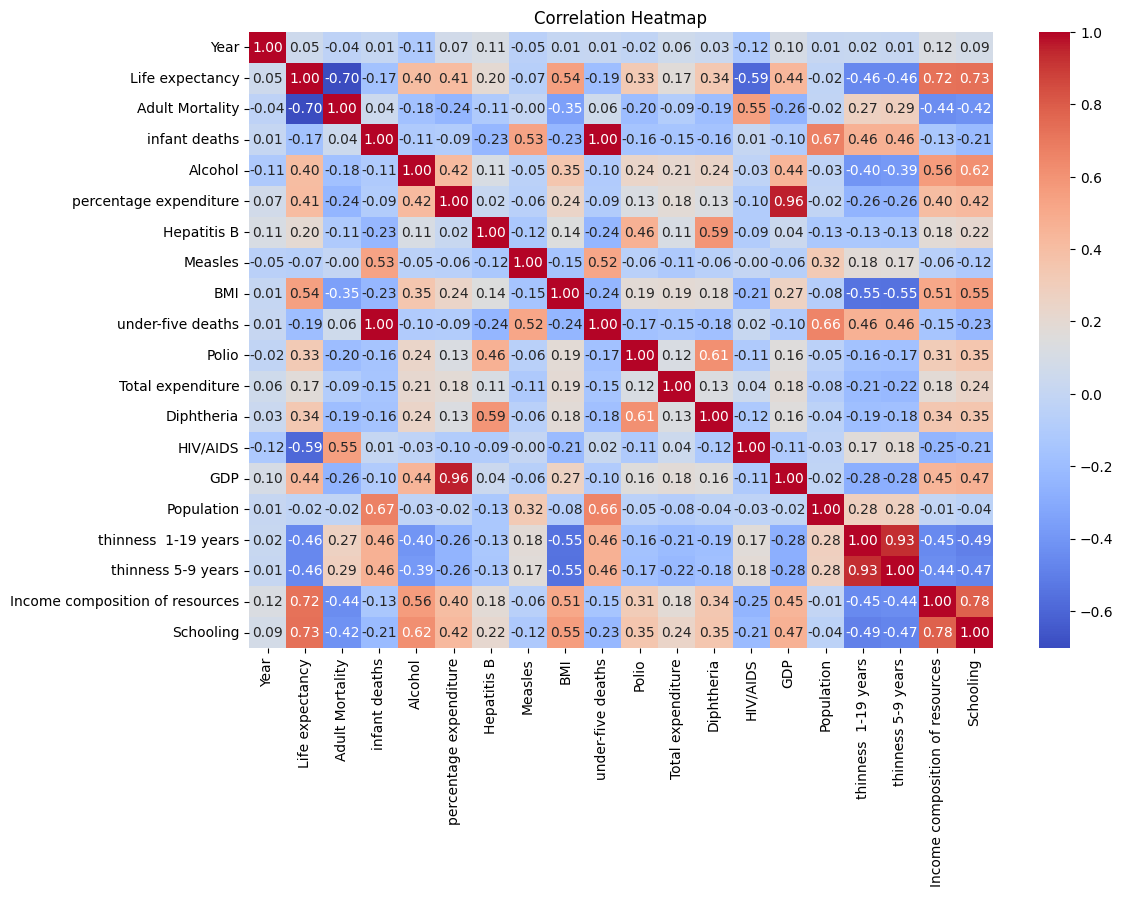

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure column names are clean
df1.columns = df1.columns.str.strip()

# Calculate correlation matrix for numerical columns
correlation_matrix = df1.select_dtypes(include=[float, int]).corr()

# Extract correlation with 'Life expectancy'
if 'Life expectancy' in correlation_matrix.columns:
    correlation_with_life_expectancy = correlation_matrix['Life expectancy'].sort_values(ascending=False)
    print("Correlation with 'Life expectancy':")
    print(correlation_with_life_expectancy)
else:
    print("Column 'Life expectancy' not found in numerical correlation matrix.")

# Visualize the correlation matrix with a heatmap (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [145]:
X = df1[['Schooling']]
y = df1['Life expectancy']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
lr = LinearRegression()

In [148]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [149]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [150]:
r2_score( y_test, y_pred)

0.5052624786801316

About 50.5% of the changes in profit is explained by the IDV - R&D spend

In [151]:
print(lr.intercept_)

41.2249887914396


In [152]:
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([64.52573243])

In [153]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [154]:
import pickle

In [155]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [156]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [157]:
X[0:5]

,Schooling
0,10.1
1,10.0
2,9.9
3,9.8
4,9.5


In [158]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([64.52573243, 64.295032  , 64.06433157, 63.83363114, 63.14152984])

In [159]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
1210    67.5  66.602036
2273    73.8  72.369547
1005    79.1  79.059860
2926    54.9  64.525732
518     48.6  55.989816


We see that the linear regression model predicts the value fairly accurately with deviation about 5% or lesser for most of the prediction

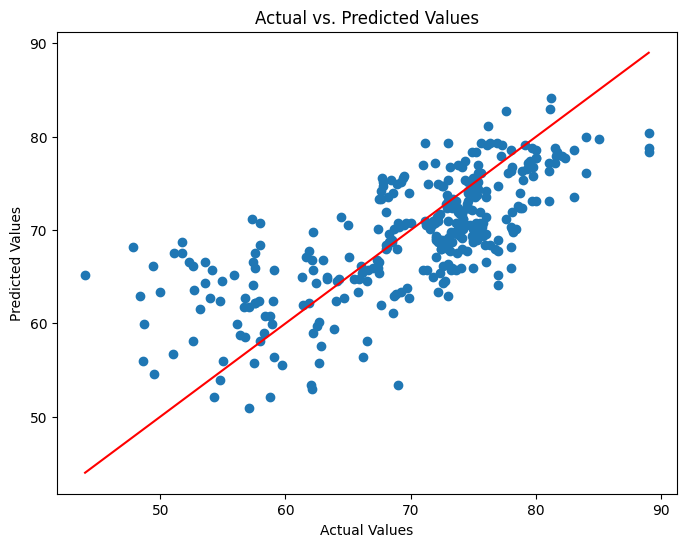

In [162]:
# prompt: plot a scatter plot between predicted and actual values

import matplotlib.pyplot as plt

# Assuming 'predictions' DataFrame is already created as in the previous code.

plt.figure(figsize=(8, 6))
plt.scatter(predictions['Actual'], predictions['Predicted'])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(predictions['Actual']), max(predictions['Actual'])], [min(predictions['Actual']), max(predictions['Actual'])], color='red')  # Add a diagonal line
plt.show()

The actual and predicted values are almost linear , hence this is a fairly decent model for predicting the life expectancy

Multiple regression

In [164]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1["Country"] = label_encoder.fit_transform(df1["Country"])

<ipython-input-164-88809a634bc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Country"] = label_encoder.fit_transform(df1["Country"])


In [165]:
# prompt: generate correlation between country and life expectancy

# Calculate correlation between 'Country' and 'Life expectancy'
correlation_country_life_expectancy = df1['Country'].corr(df1['Life expectancy'])
print(f"Correlation between Country and Life expectancy: {correlation_country_life_expectancy}")

Correlation between Country and Life expectancy: -0.11279703667910457


In [166]:
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [174]:
X1 = df1.drop(columns=['Country', 'Year', 'Status', 'Life expectancy',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years'])
y1 = df1['Life expectancy']

In [175]:
print("Shape of X1:", X1.shape)
print("Shape of y1:", y1.shape)

Shape of X1: (1649, 5)
Shape of y1: (1649,)


In [176]:
X1 = X1.values
y1 = y1.values

In [177]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [178]:
print("Shape of X1:", X1_train.shape)
print("Shape of y1:", y1_train.shape)

Shape of X1: (1319, 5)
Shape of y1: (1319,)


80% of the train data i.e 40 datas out of the 50 are taken for trainning due to text split being 20% i,.e 10 datas out 0f 50

In [179]:
# =======================================
# Multiple Linear Regression
# =======================================
from sklearn.metrics import mean_squared_error, r2_score
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X1_train, y1_train)

y1_pred_multiple = model_multiple.predict(X1_test)

mse_multiple = mean_squared_error(y1_test, y1_pred_multiple)
r2_multiple = r2_score(y1_test, y1_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 14.4926
  R² Score: 0.7959


About 80% changes in target variable life expectancy can be explained by the 5 IDVs

In [180]:
print(model_multiple.intercept_)

52.33532501748841


In [181]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [182]:
model_multiple.predict(X1[0:5])

array([63.90184173, 63.59561836, 63.46424355, 63.19220515, 62.70449813])

In [184]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred_multiple})
print(predictions.head())

   Actual  Predicted
0    67.5  70.402537
1    73.8  73.999220
2    79.1  79.439056
3    54.9  54.513025
4    48.6  51.864036


For some values the deviation between predicted and actual values is much lesser compared to the linear regression model but for some the deviation is also slightly higher , overall multiple regression model is clearly the better model for prediction

In [124]:
# prompt: convert nb to /content/LR_&_MR_for_50_Startups (1).ipynb  to html file

!jupyter nbconvert --to html /content/LR_&_MR_for_50_Startups_(1).ipynb

/bin/bash: -c: line 1: syntax error near unexpected token `1'
/bin/bash: -c: line 1: `jupyter nbconvert --to html /content/LR_&_MR_for_50_Startups_(1).ipynb'


In [125]:
!jupyter nbconvert --to html /content/LR_&_MR_for_50_Startups (1).ipynb

/bin/bash: -c: line 1: syntax error near unexpected token `1'
/bin/bash: -c: line 1: `jupyter nbconvert --to html /content/LR_&_MR_for_50_Startups (1).ipynb'
